In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [97]:
lista = ['acidez fija', 'acidez volátil' ,'ácido cítrico', 'azúcar residual', 'cloruros', 'anhídrido sulfuroso libre', 'anhídrido sulfuroso total', 'densidad' ,'pH' ,'sulfatos', 'alcohol', 'calidad']
df = pd.read_csv(r'C:\Users\Admin\Desktop\winequality-red.csv', header=0, names = lista)
df.dtypes

acidez fija                  float64
acidez volátil               float64
ácido cítrico                float64
azúcar residual              float64
cloruros                     float64
anhídrido sulfuroso libre    float64
anhídrido sulfuroso total    float64
densidad                     float64
pH                           float64
sulfatos                     float64
alcohol                      float64
calidad                        int64
dtype: object

In [32]:
promedios = df.groupby('calidad').mean()
promedios['alcohol']

calidad
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

Text(0, 0.5, 'Calidad de vinos')

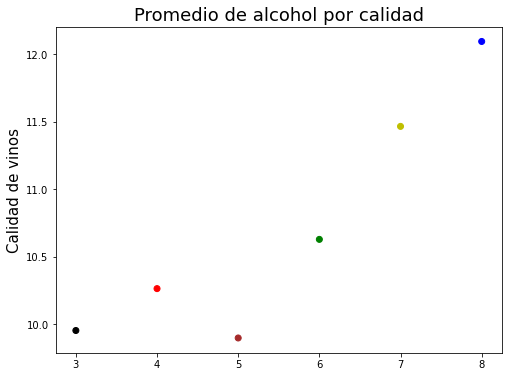

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(promedios.index,promedios['alcohol'], color = ['black','r','brown', 'g', 'y', 'b'])
ax.set_title('Promedio de alcohol por calidad', fontsize= 18)
ax.set_ylabel('Calidad de vinos', fontsize=15)

### Podemos verificar que el promedio de alcohol en los vinos de mayor calidad tiene un aumento a partir de la calidad '5' es decir podemos asumir que mientras mas alcohol tengan los vinos seran de mayor calidad

In [17]:
conteo = df.groupby('calidad').size()
X = conteo.index
Y = conteo

Text(0, 0.5, 'Cantidad de vinos')

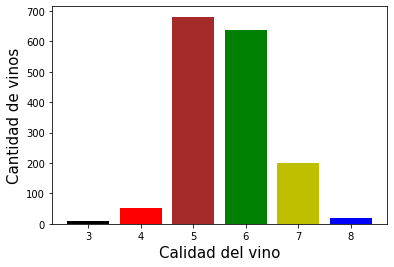

In [93]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(X, Y, color = ['black','r','brown', 'g', 'y', 'b'])
ax.set_xlabel('Calidad del vino', fontsize= 15)
ax.set_ylabel('Cantidad de vinos', fontsize=15)

### Podemos verificar que donde se concentra la mayor cantidad de vinos por calidad es en la calidad #5 y #6


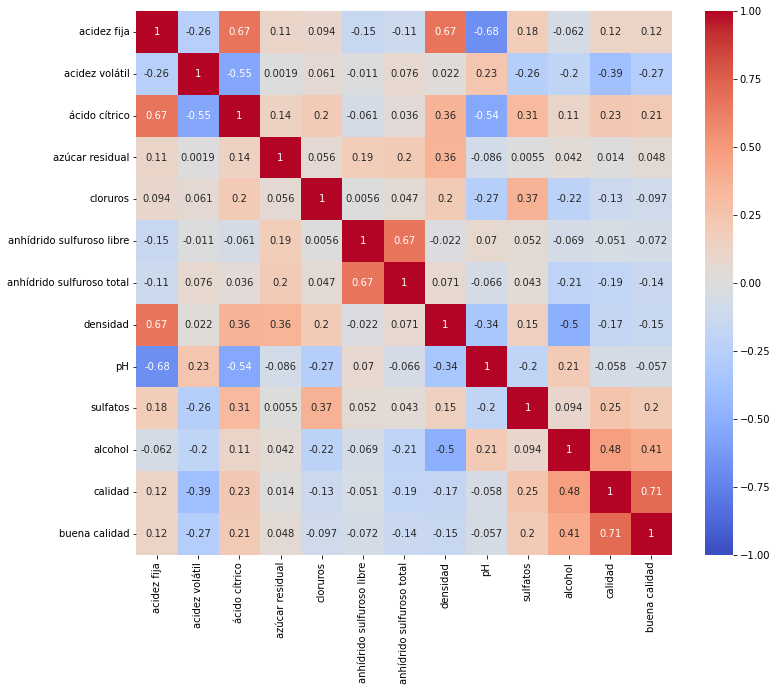

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = +1,cmap ='coolwarm')
plt.show()

### Se aprecia la matriz de correlacion en una grafica  de manera de observar graficamente que tan correlacionadas estan las columnas del DF

In [73]:
df["buena calidad"] = [0 if i<7 else 1 for i in df["calidad"]]
df.head(5)

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,anhídrido sulfuroso libre,anhídrido sulfuroso total,densidad,pH,sulfatos,alcohol,calidad,buena calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Creo una nueva columna que me muestra la "Buena Calidad" si es 1 y "Mala Calidad" si es 0 sabiendo que es de buena calidad a partir del 7

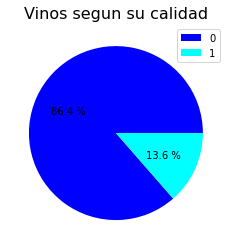

In [92]:
buena_calidad = df.groupby('buena calidad')['buena calidad'].count()
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(buena_calidad,autopct="%0.1f %%", colors = ['b','aqua'])
ax.set_title('Vinos segun su calidad', fontsize=16)
ax.legend(buena_calidad.index)

### Verificamos solamente que el 14% de los vinos son de buena calidad y en el grafico de barras pudimos verificar que ese 14% son de mejor calidad ya que llevan en promedio mas alcohol que los de baja calidad

In [177]:
max_min = pd.concat([df[df['calidad']==3],df[df['calidad']==8]])
max_min.groupby('calidad')[['alcohol', 'densidad']].describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
calidad                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        densidad                                                            \
           count      mean       std      min       25%       50%      75%   
calidad                                                                      
3           10.0  0.997464  0.002002  0.99471  0.996150  0.997565  0.99877   
8           18.0  0.995212  0.002378  0.99080  0.994175  0.994940  0.99720   

                 
            max  
calidad          
3        1.0008  
8        0.9988

### Realizamos un filtrado para ver como se comparta el vino de mayor calidad '8' y el de menor calidad '3' y verificamos que en el alcohol es notoria la diferencia de los mismos vinos

Text(0, 0.5, 'ácido cítrico')

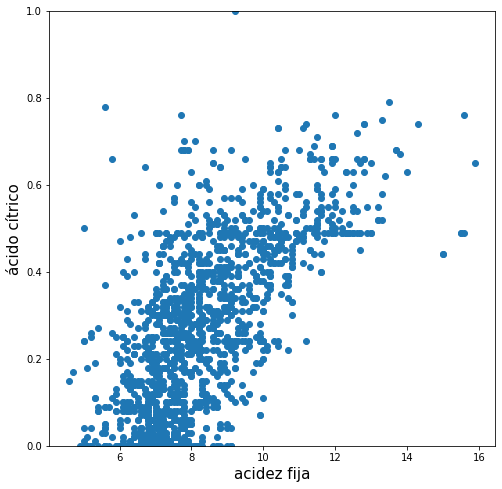

In [176]:
X = df['acidez fija']
X = X.values.reshape(-1,1)
Y = df['ácido cítrico']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X,Y)
ax.set_ylim(0,1)
ax.set_xlabel('acidez fija', fontsize=15)
ax.set_ylabel('ácido cítrico', fontsize=15)

### Primera impresion de la distribucion de los datos escogidos al azar de la matriz de correlacion ya antes graficadas

In [215]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)


### Se separan los datos del 20% del test y el 80% para entrenar

In [214]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
print('La tangente es:', regr.coef_)
print('term independiente es:  %.2f '% regr.intercept_)
print("Error Cuadratico medio: %.2f" % mean_squared_error(y_train, y_pred))
print("Erro cuadratico medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('R al Cuadrado: %.2f' % r2_score(y_train, y_pred))


La tangente es: [0.07412093]
term independiente es:  -0.34 
Error Cuadratico medio: 0.02
Erro cuadratico medio: 0.02
R al Cuadrado: 0.45


### Se crea el objeto, entrenamos el modelo, y la predicciones

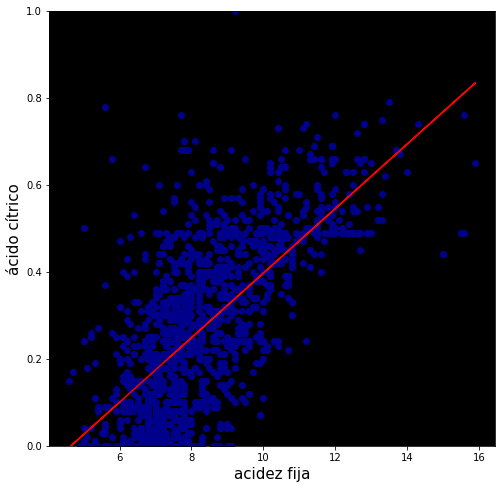

In [197]:
X = df['acidez fija']
X = X.values.reshape(-1,1)
Y = df['ácido cítrico']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylim(0,1)
ax.set_xlabel('acidez fija', fontsize=15)
ax.set_ylabel('ácido cítrico', fontsize=15)
y_regr = regr.coef_*X+ regr.intercept_
ax.scatter(X,Y, color = 'darkblue' )
ax.plot(X,y_regr,'r')
ax.set_facecolor('black')

### El resultado de la Regresión Lineal (línea de color rojo) permite evidenciar que ésta se ajusta bastante bien a los datos originales (puntos azules), lo cual permite verificar que el algoritmo de Regresión Lineal en Python funciona adecuadamente.

In [203]:
y_pred = regr.predict([[20]])
y_pred

array([1.13817403])

# Prediccion
## Variable independiente es el Acido citrico
## Variable dependiente es la Acidez fija
### Podemos verificar que con el modelo de regresion lineal, se le coloca un valor de acidez fija con valor a 20 y nos devuelve el valor que tomaria la variable independiente con dicha prediccion que es igual a la cantidad de acido citrico que se espera obtener